In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 

df_bitscore = pd.read_excel("./source_data/41592_2023_2148_MOESM5_ESM.xlsx", sheet_name="Fig2c", index_col=0)
df_bitscore.head(2)

,RfamGen,GCVAE
,,
RF00001,125.23662,98.88812
RF00002,152.42550,123.66439


In [4]:
from scipy.stats import wilcoxon

wilcoxon(
    df_bitscore["RfamGen"],
    df_bitscore["GCVAE"],
    alternative="greater"
)

WilcoxonResult(statistic=150225.0, pvalue=5.44966945780281e-30)

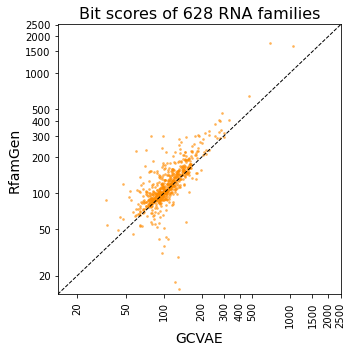

In [7]:
# plot scatter 
import numpy as np
import seaborn as sns 

fig, ax1 = plt.subplots(figsize = (5, 5))
def transform(x):
    return np.log2(x - min(df_bitscore["RfamGen"]) + 1)

data_cmvae = transform(df_bitscore["RfamGen"])
data_gcvae = transform(df_bitscore["GCVAE"])

ax1.scatter(data_gcvae, data_cmvae, marker = ".", alpha = 0.5, s = 12, color = "darkorange")
# ax1.grid(alpha = 0.3)
ax1.plot(
    [transform(0), transform(2500)],
    [transform(0), transform(2500)],
    color = "black", linestyle = "dashed", linewidth =1)

ax1.set_title("Bit scores of 628 RNA families", fontsize = 16)
ax1.set_xlabel("GCVAE", fontsize = 14)
ax1.set_ylabel("RfamGen", fontsize = 14)
ax1.set_ylim(transform(0), transform(2500))
ax1.set_xlim(transform(0), transform(2500))

ticks = [20 ,50, 100, 200, 300, 400]+[500*i for i in range(1,6)]

plt.xticks([np.log2(t+1) for t in ticks], ticks, rotation=90)
plt.yticks([np.log2(t+1) for t in ticks], ticks)


plt.tight_layout()
# fig.subplots_adjust(right=0.76)
# plt.savefig("../../outputs/figures/figure2c.pdf",transparent = True)